In [16]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)

from libs.common import *
from config.config import *

c:\Users\Admin\Data\ads_fraud_detection


# 3. Tiền xử lí dữ liệu

In [17]:
save_dir=f"{exps_dir}/exp2/exp_gaussian"

save_dir = f"{save_dir}"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [18]:
test_size=0.33
seed=42
data=pd.read_excel(f'{exps_dir}/exp2/data_EDA.xlsx')
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,week_claimed,week_incident
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,1994-Jan-1-Tuesday,1994-Dec-5-Wednesday
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,1994-Jan-4-Monday,1994-Jan-3-Wednesday
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,1994-Nov-2-Thursday,1994-Oct-5-Friday
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,1994-Jul-1-Friday,1994-Jun-2-Saturday
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,1994-Feb-2-Tuesday,1994-Jan-5-Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,1996-Nov-5-Tuesday,1996-Nov-4-Friday
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,1996-Dec-1-Friday,1996-Nov-5-Thursday
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,1996-Dec-1-Friday,1996-Nov-5-Thursday
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,1996-Dec-2-Thursday,1996-Dec-1-Monday


In [19]:
data.drop(columns=['week_incident'], inplace=True)

In [20]:
data.shape

(15420, 34)

In [21]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        1
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
week_claimed            0
dtype: int64

In [39]:
data.FraudFound_P.value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

# 4.Chuẩn hóa dữ liệu

In [22]:
numeric_columns=dict(np.load(f'{exps_dir}/exp2/columns_dtype.npz',allow_pickle=True))['numeric_columns']
numeric_columns

array(['Age', 'PolicyNumber'], dtype='<U12')

In [23]:
category_columns=dict(np.load(f'{exps_dir}/exp2/columns_dtype.npz',allow_pickle=True))['category_columns']
category_columns

array(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'Year', 'BasePolicy', 'week_claimed', 'week_incident'],
      dtype='<U20')

In [24]:
!pip install tgan

In [25]:
try:
    import tgan
except Exception as e:
    print(e)

No module named 'tgan'


In [ ]:
data_train, data_test = train_test_split(data, test_size = 0.33, random_state=seed)
print(data_train.shape,data_test.shape)
# data_train.to_excel(f'{save_dir}/datatrain.xlsx', index=None)
# data_test.to_excel(f'{save_dir}/datatest.xlsx', index=None)

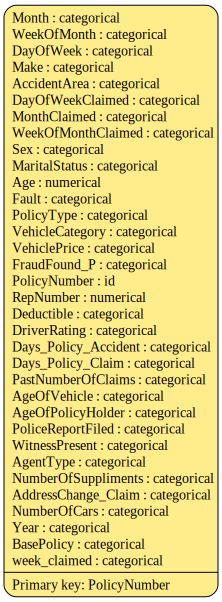

In [26]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data_train)
metadata.visualize()

In [27]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data_train)

In [28]:
synthetic_data = synthesizer.sample(num_rows=100000)
synthetic_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,week_claimed
0,Mar,5,Tuesday,Chevrolet,Urban,Monday,May,4,Male,Married,34,Policy Holder,Sedan - Liability,Sedan,20000 to 29000,0,104146016,14,500,4,more than 30,more than 30,none,more than 7,51 to 65,No,No,External,none,no change,1 vehicle,1996,All Perils,1996-Oct-4-Thursday
1,Jun,2,Saturday,Toyota,Urban,Monday,Sep,1,Male,Married,60,Third Party,Sedan - Collision,Sedan,20000 to 29000,0,869242346,7,400,4,more than 30,more than 30,none,6 years,41 to 50,No,No,External,more than 5,4 to 8 years,1 vehicle,1994,All Perils,1994-May-4-Wednesday
2,Mar,4,Friday,Pontiac,Urban,Wednesday,Nov,4,Male,Married,34,Policy Holder,Sedan - Collision,Sedan,less than 20000,0,813623316,16,400,4,more than 30,more than 30,2 to 4,7 years,51 to 65,No,No,External,more than 5,no change,1 vehicle,1994,Liability,1995-Sep-5-Friday
3,Sep,3,Thursday,Toyota,Urban,Monday,Oct,1,Male,Married,38,Policy Holder,Sedan - Liability,Sedan,less than 20000,0,877655269,15,400,1,more than 30,more than 30,2 to 4,6 years,36 to 40,No,No,External,more than 5,no change,3 to 4,1996,Collision,1996-Jul-2-Monday
4,Sep,5,Wednesday,Accura,Urban,Thursday,Apr,1,Male,Married,43,Policy Holder,Sport - Collision,Sport,20000 to 29000,0,789826160,15,400,3,more than 30,more than 30,2 to 4,6 years,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1995,Collision,1995-Apr-4-Friday


In [29]:
synthetic_data.FraudFound_P.value_counts()

FraudFound_P
0    94454
1     5546
Name: count, dtype: int64

In [30]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=data_train,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 34/34 [00:00<00:00, 309.32it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 335.30it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [31]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    data_train,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 34/34 [00:00<00:00, 100.59it/s]|
Column Shapes Score: 98.93%

(2/2) Evaluating Column Pair Trends: |██████████| 561/561 [00:08<00:00, 69.56it/s]| 
Column Pair Trends Score: 93.33%

Overall Score (Average): 96.13%



In [32]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,Month,TVComplement,0.996881
1,WeekOfMonth,TVComplement,0.994200
2,DayOfWeek,TVComplement,0.995978
3,Make,TVComplement,0.995869
4,AccidentArea,TVComplement,0.999222
5,DayOfWeekClaimed,TVComplement,0.999153
6,MonthClaimed,TVComplement,0.995365
7,WeekOfMonthClaimed,TVComplement,0.996421
8,Sex,TVComplement,0.999789
9,MaritalStatus,TVComplement,0.997111


In [33]:
list(data_train.select_dtypes('number'))

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'FraudFound_P',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

In [34]:
custom_synthesizer = GaussianCopulaSynthesizer(
    metadata,
    default_distribution='truncnorm',
    numerical_distributions={
        'WeekOfMonth': 'truncnorm',
        'WeekOfMonthClaimed': 'truncnorm',
        'Age': 'truncnorm',
        'FraudFound_P': 'truncnorm', 
        'PolicyNumber': 'uniform',     
        'RepNumber': 'uniform',         
        'Deductible': 'truncnorm',
        'DriverRating': 'truncnorm',
        'Year': 'uniform'              
    }
)

custom_synthesizer.fit(data_train)

In [35]:
synthetic_data_customized = custom_synthesizer.sample(num_rows=2200)


In [36]:
import plotly.io as pio
pio.renderers.default='iframe'

In [109]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=data_train,
    synthetic_data=synthetic_data_customized,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 40/40 [00:00<00:00, 3076.69it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 499.68it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [110]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    data_train,
    synthetic_data_customized,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 40/40 [00:00<00:00, 878.94it/s]|
Column Shapes Score: 94.55%

(2/2) Evaluating Column Pair Trends: |██████████| 780/780 [00:01<00:00, 429.74it/s]|
Column Pair Trends Score: 88.32%

Overall Score (Average): 91.44%



In [111]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,months_as_customer,TVComplement,0.993976
1,age,TVComplement,0.975043
2,policy_csl,TVComplement,0.988091
3,policy_deductable,TVComplement,0.980636
4,policy_annual_premium,KSComplement,0.978000
5,umbrella_limit,KSComplement,0.593273
6,insured_sex,TVComplement,0.997091
7,insured_education_level,TVComplement,0.975182
8,insured_occupation,TVComplement,0.975273
9,insured_hobbies,TVComplement,0.964273


In [112]:
synthetic_data_customized.fraud_reported

0       Y
1       N
2       N
3       N
4       N
       ..
2195    N
2196    N
2197    N
2198    N
2199    N
Name: fraud_reported, Length: 2200, dtype: object

In [113]:
from sklearn.utils import shuffle
gan_data_fraud=synthetic_data_customized[synthetic_data_customized.fraud_reported=="Y"]
data_train=pd.concat([data_train, gan_data_fraud] , axis=0, ignore_index=True)

data_train=pd.concat([data_train, gan_data_fraud] , axis=0, ignore_index=True)
data_train = shuffle(data_train, random_state=42)
data_train.fraud_reported.value_counts()



fraud_reported
N    753
Y    715
Name: count, dtype: int64

In [114]:
data_train.fraud_reported.tail

<bound method NDFrame.tail of 0       Y
1       Y
2       N
3       Y
4       N
       ..
1463    Y
1464    Y
1465    Y
1466    Y
1467    Y
Name: fraud_reported, Length: 1468, dtype: object>

In [116]:
x_train=data_train.drop('FraudFound_P',axis=1)
y_train=data_train['FraudFound_P']

# x_test=data_test.drop('fraud_reported',axis=1)
# y_test=data_test['fraud_reported']

In [117]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
# np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict

{0: 0.9525193798449613, 1: 1.0524625267665952}

In [118]:
y_train.value_counts()

fraud_reported
N    516
Y    467
Name: count, dtype: int64

In [119]:
x_test=data_test.drop('FraudFound_P',axis=1)
y_test=data_test['FraudFound_P']

In [120]:
label_encoders = {}
for column in category_columns:
    if column=="FraudFound_P":
        continue
    label_encoder = LabelEncoder()
    x_train[column] = label_encoder.fit_transform(x_train[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_train

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,day_policy_bind_date,month_policy_bind_date,year_policy_bind_date,day_incident_date,month_incident_date,year_incident_date
1262,1,0,48,2,2,-0.850687,96,0,6,7,10,5,-0.707927,-0.885555,0,3,0,3,45,243,1,0,1,0,3,0,-0.286414,-0.473590,-1.219227,-0.338709,8,3,0,-0.863849,1.654162,-0.782054,0.865719,0.968505,0.0
1246,1,2,14,1,1,-0.202569,38,0,4,12,9,1,-0.927501,-1.249936,2,2,0,0,2,282,3,0,0,0,1,0,0.965444,1.768147,0.772269,0.880589,11,9,2,0.840386,1.654162,-0.096397,0.749999,-0.954809,0.0
1018,1,2,49,1,0,0.902271,294,1,1,4,8,3,-0.913864,-0.600628,2,2,1,2,27,177,1,0,1,2,2,0,0.246613,2.074123,-0.007608,0.066965,7,29,2,0.499539,-1.347021,0.177866,-0.522916,0.968505,0.0
558,1,0,11,0,0,0.706068,98,0,1,3,19,1,-0.927501,0.307595,0,3,2,1,51,226,0,2,1,2,1,0,-1.152381,-0.991506,-1.009080,-1.088012,10,3,1,1.067617,-0.746785,1.686312,0.749999,0.968505,0.0
490,1,2,36,2,2,1.188206,98,1,2,1,12,4,0.708939,-0.088946,3,0,1,4,51,7,1,0,2,1,1,1,-1.993586,-1.493040,-1.516051,-2.007038,12,11,1,1.067617,-1.347021,0.863523,0.634280,0.968505,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,2,37,1,2,2.897459,120,1,0,10,11,5,-0.927501,0.895165,2,2,0,4,10,291,0,0,2,1,3,1,0.936914,0.043314,0.810701,1.286686,10,28,1,1.635696,-0.746785,-1.330579,1.675756,-0.954809,0.0
1294,0,0,5,1,1,1.636007,60,0,5,13,19,2,0.721922,-1.478547,0,3,1,0,44,204,0,2,2,1,0,2,0.471236,0.429171,-0.170329,0.634739,8,36,2,1.522080,0.153570,1.412049,-0.407196,-0.954809,0.0
860,1,0,12,0,1,-0.964450,98,0,4,0,9,3,-0.927501,-0.631005,0,2,1,2,26,195,0,2,1,1,2,2,0.139578,0.620280,0.620178,-0.117105,0,23,0,0.045076,1.354043,0.314998,-1.101514,0.968505,0.0
1459,1,2,5,2,2,-0.115118,203,1,6,13,10,1,1.614182,-0.926046,0,2,0,3,5,178,3,2,1,0,2,2,0.372002,0.126633,-0.949592,0.585452,11,33,2,1.181233,1.053925,-0.644922,-0.754355,-0.954809,0.0


In [121]:
x_train.to_excel(f'{save_dir}/x_train.xlsx', index=False)
y_train.to_excel(f'{save_dir}/y_train.xlsx', index=False)

In [122]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict


{0: 0.9525193798449613, 1: 1.0524625267665952}

In [123]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"+ X_train: {len(x_train)}")
for fold, (train_idx, valid_idx) in enumerate(kfold.split(x_train, y_train)):
    print(f'Fold {fold}: ')
    print(f'+ train_idx: {train_idx}')
    print(f'+ valid_idx: {valid_idx}')
    print(f'+ train / valid: {valid_idx}')
    pass

+ X_train: 983
Fold 0: 
+ train_idx: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  31  32  33  34  35  36  37  38
  40  41  42  43  45  46  47  48  50  51  52  53  54  56  57  58  61  62
  64  68  69  71  73  74  75  77  79  80  81  82  83  84  85  87  89  90
  91  92  93  94  95  97  98  99 100 101 102 103 104 105 106 108 109 111
 112 113 114 115 116 117 118 119 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 138 140 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 159 160 161 162 163 164 166 167 169 170 171 172 173
 175 176 177 178 179 180 181 182 183 185 186 187 188 189 190 191 192 193
 194 195 196 197 200 201 202 203 204 205 206 207 208 211 212 214 216 217
 219 220 222 223 224 225 226 227 228 229 230 232 233 234 236 238 239 240
 241 242 243 245 246 248 249 250 251 252 253 255 256 257 258 259 262 263
 264 265 267 268 269 270 271 272 273 274 276 278 279 282 283 284 285 286
 287 288 289 2

In [124]:
object_cols_test=dict(np.load(f'{exps_dir}/exp2/columns_dtype.npz',allow_pickle=True))['category_columns']
numeric_cols_test=dict(np.load(f'{exps_dir}/exp2/columns_dtype.npz',allow_pickle=True))['numeric_columns']
# for column in outliers_list:
#     data_test = remove_outliers_iqr(data_test, column)
# data_test['collision_type'].replace('?',np.nan,inplace=True)
# data_test['collision_type'].fillna(method='ffill',inplace=True)
# data_test[['property_damage','police_report_available']].replace('?','Unknow',inplace=True)
# (data_test=='?').sum()
label_encoders = {}
for column in object_cols_test:
    if column=="FraudFound_P":
        continue
    label_encoder = LabelEncoder()
    x_test[column] = label_encoder.fit_transform(x_test[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = StandardScaler()
x_test[numeric_cols_test] = scaler.fit_transform(x_test[numeric_cols_test])

x_test=data_test.drop('FraudFound_P',axis=1)
y_test=data_test['FraudFound_P']
data_test.to_excel(f'{save_dir}/df_test_minmax.xlsx', index=False)
x_test.to_excel(f'{save_dir}/x_test.xlsx', index=False)
y_test.to_excel(f'{save_dir}/y_test.xlsx', index=False)